In [1]:
from _TES import TES
from _QET import QET
from _absorber import Absorber
from _detector import Detector
from simulated_noise import simulate_noise, calc_res

import numpy as np


In [2]:
l = 140e-6 #2.5e-05*10
w = 2.5e-06
l_overlap = 20e-6
n_fins = 6
sigma = 220000000.0
t0 = 40e-3
res_n = 0.23999999999999996
res_n = 1
0.45
con_type= 'ellipse'
#con_type= 'modern'
l_f = 150e-6 * 0.9#0.00030500000000000015
h_fin = 600e-6# 9e-07
ahole = 4.9e-11


absorber = Absorber("Si", "square", 1e-3, 1e-2, 3e-3)
#absorber.print()

In [3]:
tes = TES(length=l,
       width=w, 
       l_overlap = l_overlap,
       n_fin=n_fins,
       sigma=sigma,
       rn=res_n,
       rsh = 5e-3,
       rp = 6e-3,   

   
   L_tot= 5e-08,)
#tes.print()
qet = QET(l_fin=l_f, h_fin=h_fin, TES=tes, ahole=ahole, type_qp_eff=2)
#qet.print()

In [4]:
det = Detector('farts', absorber, qet)
#det.print()

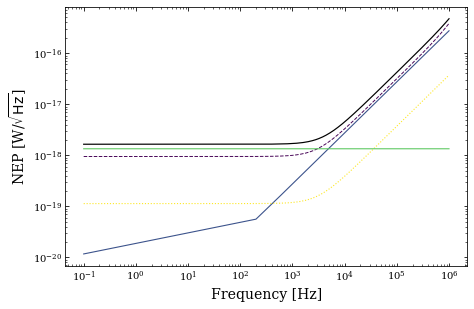

In [6]:
det.calc_res()
det.plot_sp()

0.22995550667739265

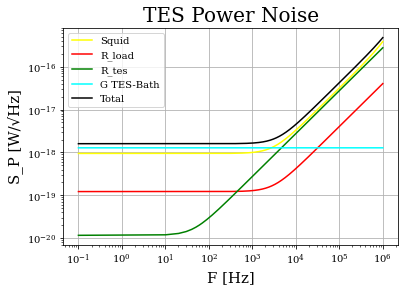

In [6]:
simulate_noise(det)

In [10]:
(3.375*2, 3.375*(.66)*2)

(6.75, 4.455)

In [6]:
calc_res(det, freqs=np.linspace(.1,1e6, 10000))

0.23423586382951736

5

In [6]:
0.23007143698444069

array([4.70235878e-05, 9.40542141e-05, 9.40682922e-05, ...,
       2.97292023e+02, 0.00000000e+00, 1.48679387e+02])

In [5]:
vol = 100e-6*400e-6*40e-9
4e-12/vol
g = 4e-12

In [9]:
#K = vol * sigma
n=5
tc = 40e-3
K = g/(n*tc**(n-1))
K/vol

195312500.0

In [6]:
import scipy.constants as constants
constants.k

1.380649e-23

In [ ]:
self.K = self.tot_volume * sigma
        

        #  ---- Bias Point Temperature ----
        # let's calculate the temperature of the operating point resistance.
        # [Notice that if the resistance of the TES changes with current, then this doesn't work]
        zeta_o = np.log(self.fOp/(1 - self.fOp))/2
        self.t0 = zeta_o * self.wTc + self.T_c # K    
        self.Gep = self.n * self.K * self.t0 ** (self.n-1)